In [1]:
import pandas as pn

### Reading all the COVID related and Employemnt csv files.

In [3]:
Data = pn.read_csv("../../../../data/stage_1/Employment_Data_Annual_2020.csv")
Deaths = pn.read_csv("../../../../data/stage_1/covid_deaths_usafacts.csv")
Cases = pn.read_csv("../../../../data/stage_1/covid_confirmed_usafacts.csv")
Population = pn.read_csv("../../../../data/stage_1/covid_county_population_usafacts.csv")

### Indiana State (State ID-18) COVID-19 trend for the last week of the data

The number of confirmed cases in each county are added to get the total confirmed cases in Indiana. The results are plotted on the obtained data to find the trend.

In [4]:
Cases_IN = Cases[Cases['StateFIPS']==18]
Cases_trend = (Cases_IN.iloc[:,-7:]).sum()

In [5]:
Deaths_IN = Deaths[Deaths['StateFIPS']==18]
Deaths_trend = (Deaths_IN.iloc[:,-7:]).sum()

### From the below plots it is clear that the cases and deaths are increased in the last week of the given data.

<AxesSubplot:>

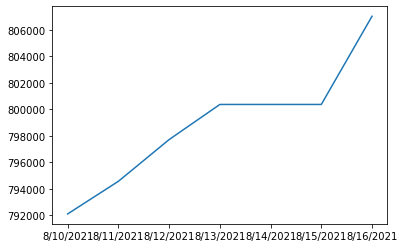

In [6]:
Cases_trend.plot()

<AxesSubplot:>

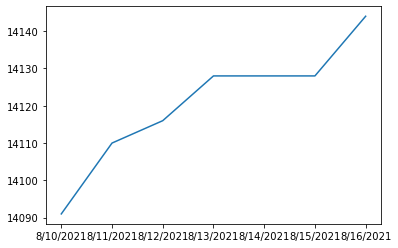

In [7]:
Deaths_trend.plot()

### Employment Data:

In [8]:
Data

,area_fips,own_code,industry_code,agglvl_code,size_code,year,qtr,disclosure_code,qtrly_estabs,month1_emplvl,...,oty_month3_emplvl_chg,oty_month3_emplvl_pct_chg,oty_total_qtrly_wages_chg,oty_total_qtrly_wages_pct_chg,oty_taxable_qtrly_wages_chg,oty_taxable_qtrly_wages_pct_chg,oty_qtrly_contributions_chg,oty_qtrly_contributions_pct_chg,oty_avg_wkly_wage_chg,oty_avg_wkly_wage_pct_chg
0,1000,0,10,50,0,2020,1,NaN,129525,1975812,...,6243,0.3,898010082,3.7,198663577,2.0,-7200684,-6.0,28,3.0
1,1000,0,10,50,0,2020,2,NaN,130654,1765567,...,-128335,-6.4,-791715293,-3.4,-507513171,-19.6,-8950309,-27.6,54,5.9
2,1000,0,10,50,0,2020,3,NaN,132993,1882119,...,-84746,-4.3,326511252,1.4,-79279130,-4.5,-2193892,-9.8,59,6.4
3,1000,0,10,50,0,2020,4,NaN,135331,1931745,...,-62768,-3.1,2074217202,8.1,112582167,7.2,843837,4.1,115,11.7
4,1000,1,10,51,0,2020,1,NaN,1247,54521,...,1524,2.8,-6087967,-0.5,0,0.0,0,0.0,-45,-2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14411035,USMSA,0,10,91,0,2020,4,NaN,8625844,121531298,...,-8415868,-6.5,124348591032,6.1,-658309454,-0.4,-222143962,-7.4,161,13.3
14411036,USNMS,0,10,93,0,2020,1,NaN,1970354,19487523,...,-6051,0.0,9563684568,3.9,2789458378,2.2,-152013081,-7.0,34,3.5
14411037,USNMS,0,10,93,0,2020,2,NaN,1991287,17419081,...,-1485568,-7.4,-7392910935,-3.1,-6171058636,-10.7,-198193297,-21.4,67,7.2
14411038,USNMS,0,10,93,0,2020,3,NaN,2028234,18533826,...,-848072,-4.3,1749082557,0.7,-2016008284,-5.1,-82127042,-12.5,57,6.1


#### Merging the Deaths and Cases datasets

In [9]:
merge_dc = pn.merge(Deaths,Cases, on=['countyFIPS','County Name','State','StateFIPS'])

#### Merging the above dataset with the Population Dataset

In [10]:
merge_dcp = pn.merge(merge_dc,Population, on=['countyFIPS','State'])

In [11]:
merge_dcp_i = merge_dcp.set_index("countyFIPS")
merge_dcp_i = merge_dcp_i.drop(0)
merge_dcp_i

,County Name_x,State,StateFIPS,1/22/2020_x,1/23/2020_x,1/24/2020_x,1/25/2020_x,1/26/2020_x,1/27/2020_x,1/28/2020_x,...,8/9/2021_y,8/10/2021_y,8/11/2021_y,8/12/2021_y,8/13/2021_y,8/14/2021_y,8/15/2021_y,8/16/2021_y,County Name_y,population
countyFIPS,,,,,,,,,,,,,,,,,,,,,
1001,Autauga County,AL,1,0,0,0,0,0,0,0,...,7788,7818,7854,7890,7931,7931,7931,8061,Autauga County,55869
1003,Baldwin County,AL,1,0,0,0,0,0,0,0,...,27477,27736,28020,28358,28629,28629,28629,29234,Baldwin County,223234
1005,Barbour County,AL,1,0,0,0,0,0,0,0,...,2629,2649,2681,2699,2732,2732,2732,2761,Barbour County,24686
1007,Bibb County,AL,1,0,0,0,0,0,0,0,...,3016,3034,3056,3069,3095,3095,3095,3129,Bibb County,22394
1009,Blount County,AL,1,0,0,0,0,0,0,0,...,7603,7631,7658,7696,7758,7758,7758,7833,Blount County,57826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,Sweetwater County,WY,56,0,0,0,0,0,0,0,...,5056,5090,5090,5108,5114,5127,5127,5127,Sweetwater County,42343
56039,Teton County,WY,56,0,0,0,0,0,0,0,...,3960,4003,4003,4014,4044,4068,4068,4068,Teton County,23464
56041,Uinta County,WY,56,0,0,0,0,0,0,0,...,2498,2538,2538,2543,2559,2593,2593,2593,Uinta County,20226


#### Finding the values of 'area_fips' from employment dataset that are not present in primary COVID-19 Dataset

In [12]:
counties=merge_dcp['countyFIPS'].unique()
D_code=Data['area_fips'].unique()
temp=[]
for i in D_code:
    for x in counties:
        if i == x:
            temp.append(i)
            break
final=[]
for x in D_code:
    if x not in temp:
        final.append(x)

### Making 'area_fips' column as index to drop the rows. 

In [13]:
Data_i = Data.set_index("area_fips")
Data_i

,own_code,industry_code,agglvl_code,size_code,year,qtr,disclosure_code,qtrly_estabs,month1_emplvl,month2_emplvl,...,oty_month3_emplvl_chg,oty_month3_emplvl_pct_chg,oty_total_qtrly_wages_chg,oty_total_qtrly_wages_pct_chg,oty_taxable_qtrly_wages_chg,oty_taxable_qtrly_wages_pct_chg,oty_qtrly_contributions_chg,oty_qtrly_contributions_pct_chg,oty_avg_wkly_wage_chg,oty_avg_wkly_wage_pct_chg
area_fips,,,,,,,,,,,,,,,,,,,,,
1000,0,10,50,0,2020,1,NaN,129525,1975812,1986981,...,6243,0.3,898010082,3.7,198663577,2.0,-7200684,-6.0,28,3.0
1000,0,10,50,0,2020,2,NaN,130654,1765567,1818011,...,-128335,-6.4,-791715293,-3.4,-507513171,-19.6,-8950309,-27.6,54,5.9
1000,0,10,50,0,2020,3,NaN,132993,1882119,1899453,...,-84746,-4.3,326511252,1.4,-79279130,-4.5,-2193892,-9.8,59,6.4
1000,0,10,50,0,2020,4,NaN,135331,1931745,1943477,...,-62768,-3.1,2074217202,8.1,112582167,7.2,843837,4.1,115,11.7
1000,1,10,51,0,2020,1,NaN,1247,54521,54643,...,1524,2.8,-6087967,-0.5,0,0.0,0,0.0,-45,-2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USMSA,0,10,91,0,2020,4,NaN,8625844,121531298,122115861,...,-8415868,-6.5,124348591032,6.1,-658309454,-0.4,-222143962,-7.4,161,13.3
USNMS,0,10,93,0,2020,1,NaN,1970354,19487523,19575565,...,-6051,0.0,9563684568,3.9,2789458378,2.2,-152013081,-7.0,34,3.5
USNMS,0,10,93,0,2020,2,NaN,1991287,17419081,17962694,...,-1485568,-7.4,-7392910935,-3.1,-6171058636,-10.7,-198193297,-21.4,67,7.2


### Dropping the rows and the updated dataset after

In [14]:
Data_i=Data_i.drop(final)
Data_i

,own_code,industry_code,agglvl_code,size_code,year,qtr,disclosure_code,qtrly_estabs,month1_emplvl,month2_emplvl,...,oty_month3_emplvl_chg,oty_month3_emplvl_pct_chg,oty_total_qtrly_wages_chg,oty_total_qtrly_wages_pct_chg,oty_taxable_qtrly_wages_chg,oty_taxable_qtrly_wages_pct_chg,oty_qtrly_contributions_chg,oty_qtrly_contributions_pct_chg,oty_avg_wkly_wage_chg,oty_avg_wkly_wage_pct_chg
area_fips,,,,,,,,,,,,,,,,,,,,,
1001,0,10,70,0,2020,1,NaN,889,11077,11045,...,86,0.8,4973287,4.4,1440687,3.1,41283,7.5,27,3.4
1001,0,10,70,0,2020,2,NaN,896,9936,10580,...,-466,-4.2,-2262969,-2.1,-1138236,-8.6,-674,-0.4,36,4.9
1001,0,10,70,0,2020,3,NaN,918,10716,10802,...,-305,-2.7,5273413,4.8,352635,4.2,8987,9.0,60,7.8
1001,0,10,70,0,2020,4,NaN,936,10870,11008,...,-344,-3.0,9683120,8.3,398908,5.0,8482,8.3,89,11.2
1001,1,10,71,0,2020,1,NaN,10,81,84,...,2,2.4,43627,4.2,0,0.0,0,0.0,52,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56045,5,99999,77,0,2020,4,NaN,2,0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
56045,5,999999,78,0,2020,1,-,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
56045,5,999999,78,0,2020,2,-,0,0,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


### Considering one combination of Ownership Code and Industry Code to reduce the occurances per county.

In [15]:
Data_i=Data_i[Data_i['own_code']==5]

In [16]:
Data_i=Data_i[Data_i['industry_code']=='1021']
Data_i

,own_code,industry_code,agglvl_code,size_code,year,qtr,disclosure_code,qtrly_estabs,month1_emplvl,month2_emplvl,...,oty_month3_emplvl_chg,oty_month3_emplvl_pct_chg,oty_total_qtrly_wages_chg,oty_total_qtrly_wages_pct_chg,oty_taxable_qtrly_wages_chg,oty_taxable_qtrly_wages_pct_chg,oty_qtrly_contributions_chg,oty_qtrly_contributions_pct_chg,oty_avg_wkly_wage_chg,oty_avg_wkly_wage_pct_chg
area_fips,,,,,,,,,,,,,,,,,,,,,
1001,5,1021,73,0,2020,1,NaN,191,2137,2125,...,38,1.8,2462818,11.2,924986,8.5,2890,3.0,76,9.4
1001,5,1021,73,0,2020,2,NaN,190,2128,2175,...,50,2.4,1343615,6.9,199445,5.8,1013,3.3,31,4.4
1001,5,1021,73,0,2020,3,NaN,196,2156,2182,...,75,3.6,2581688,13.6,103556,5.0,481,2.5,70,10.1
1001,5,1021,73,0,2020,4,NaN,198,2130,2250,...,8,0.4,1679965,7.8,301211,13.7,953,4.6,51,6.7
1003,5,1021,73,0,2020,1,NaN,1505,17615,17630,...,41,0.2,5910128,3.8,3149713,3.2,-29954,-3.1,18,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56043,5,1021,73,0,2020,4,NaN,84,619,630,...,64,11.2,485421,7.4,122145,7.4,-4749,-15.7,-15,-1.7
56045,5,1021,73,0,2020,1,NaN,60,415,407,...,37,10.0,325143,10.9,240082,8.2,-9077,-21.4,29,4.9
56045,5,1021,73,0,2020,2,NaN,60,404,433,...,35,9.0,551669,17.6,362425,14.8,-105,-0.2,66,10.8


### Even after considering the value for only one combination of Ownership code and Industry code, the ouput is had 4 records(one for each quarter). Hence considering only Quarter -1 at this stage.  

In [17]:
Data_i=Data_i[Data_i['qtr']==1]
Data_i

,own_code,industry_code,agglvl_code,size_code,year,qtr,disclosure_code,qtrly_estabs,month1_emplvl,month2_emplvl,...,oty_month3_emplvl_chg,oty_month3_emplvl_pct_chg,oty_total_qtrly_wages_chg,oty_total_qtrly_wages_pct_chg,oty_taxable_qtrly_wages_chg,oty_taxable_qtrly_wages_pct_chg,oty_qtrly_contributions_chg,oty_qtrly_contributions_pct_chg,oty_avg_wkly_wage_chg,oty_avg_wkly_wage_pct_chg
area_fips,,,,,,,,,,,,,,,,,,,,,
1001,5,1021,73,0,2020,1,NaN,191,2137,2125,...,38,1.8,2462818,11.2,924986,8.5,2890,3.0,76,9.4
1003,5,1021,73,0,2020,1,NaN,1505,17615,17630,...,41,0.2,5910128,3.8,3149713,3.2,-29954,-3.1,18,2.6
1005,5,1021,73,0,2020,1,NaN,139,1383,1360,...,-67,-4.7,-689462,-4.8,-358317,-4.4,-3641,-4.8,-2,-0.3
1007,5,1021,73,0,2020,1,NaN,89,937,961,...,179,22.8,1901579,27.3,1368184,30.3,34911,78.3,29,4.2
1009,5,1021,73,0,2020,1,NaN,189,1614,1611,...,-56,-3.4,-354516,-2.3,-353330,-3.6,-7910,-10.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,5,1021,73,0,2020,1,NaN,351,4234,4191,...,-176,-4.1,-2096212,-3.9,-1508021,-3.1,-218430,-43.9,-6,-0.6
56039,5,1021,73,0,2020,1,NaN,337,2564,2502,...,-302,-11.1,1305469,4.7,517130,2.0,-23168,-13.6,117,15.1
56041,5,1021,73,0,2020,1,NaN,163,1698,1682,...,-20,-1.2,554202,3.2,354692,2.2,-73496,-48.8,38,4.9


### Renaming the 'area_fips' column in employment Dataset to 'countyFIPS' to match the primary COVID dataset

In [18]:
Data_i=Data_i.rename_axis('countyFIPS')

## Merging Employement Dataset with the primary COVID-19 Dataset

In [19]:
merge = pn.merge(merge_dcp_i,Data_i, on='countyFIPS')
merge

,County Name_x,State,StateFIPS,1/22/2020_x,1/23/2020_x,1/24/2020_x,1/25/2020_x,1/26/2020_x,1/27/2020_x,1/28/2020_x,...,oty_month3_emplvl_chg,oty_month3_emplvl_pct_chg,oty_total_qtrly_wages_chg,oty_total_qtrly_wages_pct_chg,oty_taxable_qtrly_wages_chg,oty_taxable_qtrly_wages_pct_chg,oty_qtrly_contributions_chg,oty_qtrly_contributions_pct_chg,oty_avg_wkly_wage_chg,oty_avg_wkly_wage_pct_chg
countyFIPS,,,,,,,,,,,,,,,,,,,,,
1001,Autauga County,AL,1,0,0,0,0,0,0,0,...,38,1.8,2462818,11.2,924986,8.5,2890,3.0,76,9.4
1003,Baldwin County,AL,1,0,0,0,0,0,0,0,...,41,0.2,5910128,3.8,3149713,3.2,-29954,-3.1,18,2.6
1005,Barbour County,AL,1,0,0,0,0,0,0,0,...,-67,-4.7,-689462,-4.8,-358317,-4.4,-3641,-4.8,-2,-0.3
1007,Bibb County,AL,1,0,0,0,0,0,0,0,...,179,22.8,1901579,27.3,1368184,30.3,34911,78.3,29,4.2
1009,Blount County,AL,1,0,0,0,0,0,0,0,...,-56,-3.4,-354516,-2.3,-353330,-3.6,-7910,-10.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,Sweetwater County,WY,56,0,0,0,0,0,0,0,...,-176,-4.1,-2096212,-3.9,-1508021,-3.1,-218430,-43.9,-6,-0.6
56039,Teton County,WY,56,0,0,0,0,0,0,0,...,-302,-11.1,1305469,4.7,517130,2.0,-23168,-13.6,117,15.1
56041,Uinta County,WY,56,0,0,0,0,0,0,0,...,-20,-1.2,554202,3.2,354692,2.2,-73496,-48.8,38,4.9


#### Shape of Merge File

In [20]:
merge.shape

(3139, 1192)

#### Shape of Covid-19 primary dataset

In [21]:
merge_dcp.shape

(3193, 1152)